In [16]:
import numpy as np
import pandas as pd
import os, time
import pickle, gzip
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [31]:
file = './datasets/mnist_data/mnist.pkl.gz'
with gzip.open(file, 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train) + len(X_validation))
test_index = range(len(X_train) + len(X_validation), len(X_train) + len(X_validation) + len(X_test))


In [18]:
from sklearn.decomposition import PCA

train_index = range(0,len(X_train))

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA, index=train_index)

In [19]:
print("Variance explained by all 784 principal components: ", sum(pca.explained_variance_ratio_))

Variance explained by all 784 principal components:  1.0000000296227127


In [20]:
importanceOfPrincipalComponents = \
       pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T
print('Variance Captured by First 10 Principal Components: ',
         importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
         importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
         importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
         importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
         importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
         importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.48876244]
Variance Captured by First 20 Principal Components:  [0.6439803]
Variance Captured by First 50 Principal Components:  [0.82486093]
Variance Captured by First 100 Principal Components:  [0.9146586]
Variance Captured by First 200 Principal Components:  [0.9665008]
Variance Captured by First 300 Principal Components:  [0.98624897]


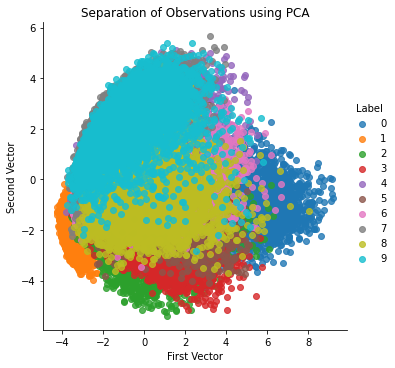

In [30]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.iloc[:, :2], index=xDF.index)
    tempDF = pd.concat((tempDF, pd.Series(yDF)), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label",
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using " + algoName)

scatterPlot(X_train_PCA, y_train, "PCA")

In [24]:
X_train_PCA.shape

(50000, 784)

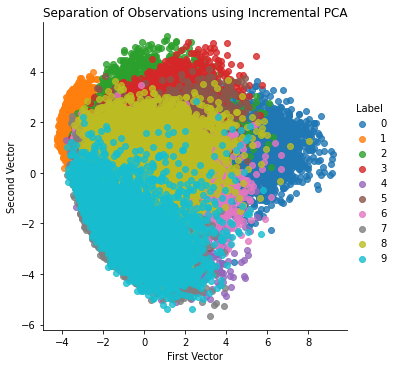

In [32]:
from sklearn.decomposition import IncrementalPCA

incrementalPCA = IncrementalPCA(n_components=784, batch_size=None)
X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = pd.DataFrame(data=X_train_incrementalPCA, index=train_index)

X_validation_incrementalPCA = incrementalPCA.transform(X_validation)
X_validation_incrementalPCA = pd.DataFrame(data=X_validation_incrementalPCA, index=validation_index)

scatterPlot(X_train_incrementalPCA, y_train, "Incremental PCA")
